## **Question 1**

##A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

##- s[i] == 'I' if perm[i] < perm[i + 1], and
##- s[i] == 'D' if perm[i] > perm[i + 1].

##Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

##**Example 1:**

##**Input:** s = "IDID"

##**Output:**

##[0,4,1,3,2]


In [3]:
def permutation(s):
  n = len(s)
  perm = []
  low = 0
  high = n

  for i in s:
    if i == 'I':
      perm.append(low)
      low += 1
    elif i == 'D':
      perm.append(high)
      high -= 1

  perm.append(low)

  return perm

s = 'IDID'
result = permutation(s)
print(f"Output : {result}")

Output : [0, 4, 1, 3, 2]


##**Question 2**

##You are given an m x n integer matrix matrix with the following two properties:

##- Each row is sorted in non-decreasing order.
##- The first integer of each row is greater than the last integer of the previous row.

##Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

##You must write a solution in O(log(m * n)) time complexity.

##**Example 1:**


##**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

## **Output:** true

In [4]:
def search(matrix, target):
  m = len(matrix)
  n = len(matrix[0])
  left = 0
  right = m*n-1

  while left <= right:
    mid = (left + right) // 2
    row = mid // n
    col = mid % n
    mid_element = matrix[row][col]

    if mid_element == target:
      return True
    elif mid_element > target:
      right = mid - 1
    else:
      left = mid + 1
    
  return False

matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]] 
target = 3
result = search(matrix,target)
print(f"Output : {result}")

Output : True


##**Question 3**

##Given an array of integers arr, return *true if and only if it is a valid mountain array*.

##Recall that arr is a mountain array if and only if:

##- arr.length >= 3
##- There exists some i with 0 < i < arr.length - 1 such that:
##    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
##    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]



##**Example 1:**

##**Input:** arr = [2,1]

##**Output:**

##false

In [10]:
def mountain(arr):
  n = len(arr)
  if n < 3:
    return False

  left = 0
  right = n-1

  while left < n-1 and arr[left] < arr[left + 1]:
    left += 1

  while left > 0 and arr[right - 1] > arr[right]:
    right -= 1

  return left > 0 and right < n-1 and left == right

arr = [2,1]
result = mountain(arr)
print(f"Output : {result}")

Output : False


##**Question 4**

##Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

##**Example 1:**

##**Input:** nums = [0,1]

##**Output:** 2

##**Explanation:**

##[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.


In [11]:
def maximum(nums):
  max_length = 0
  count = 0
  count_map = {0: -1}

  for i, num in enumerate(nums):
    count += 1 if num == 1 else -1

    if count in count_map:
      length = i - count_map[count]
      max_length = max(max_length, length)
    else:
      count_map[count] = i

  return max_length

nums = [0,1]
result = maximum(nums)
print(f"Output : {result}")

Output : 2


## **Question 5**

##The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

##- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

##Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

##**Example 1:**

##**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

##**Output:** 40

##**Explanation:**

##We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.


In [15]:
def minimum(nums1,nums2):
  nums1.sort()
  nums2.sort(reverse=True)
  min_product = 0

  for i in range(len(nums1)):
    min_product += nums1[i] * nums2[i]

  return min_product

nums1 = [3,5,4,2]
nums2 = [4,2,2,5]
result = minimum(nums1,nums2)
print(f"Output : {result}")

Output : 40


##**Question 6**

##An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

##Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

##**Example 1:**

##**Input:** changed = [1,3,4,2,6,8]

##**Output:** [1,3,4]

##**Explanation:** One possible original array could be [1,3,4]:

##- Twice the value of 1 is 1 * 2 = 2.
##- Twice the value of 3 is 3 * 2 = 6.
##- Twice the value of 4 is 4 * 2 = 8.

##Other original arrays could be [4,3,1] or [3,1,4].


In [16]:
from collections import Counter

def original(changed):
  if len(changed) % 2 != 0:
    return []

  original = []
  freq_map = Counter(changed)

  changed.sort()

  for num in changed:
    if freq_map[num] == 0:
      continue
    if freq_map[num * 2] == 0:
      return []
    freq_map[num] -= 1
    freq_map[num * 2] -= 1
    original.append(num)

  return original

changed = [1,3,4,2,6,8]
result = original(changed)
print(f"Output : {result}")

Output : [1, 3, 4]


## **Question 7**

##Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

##**Example 1:**


##**Input:** n = 3

##**Output:** [[1,2,3],[8,9,4],[7,6,5]]

##**Question 8**

##Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

##**Example 1:**
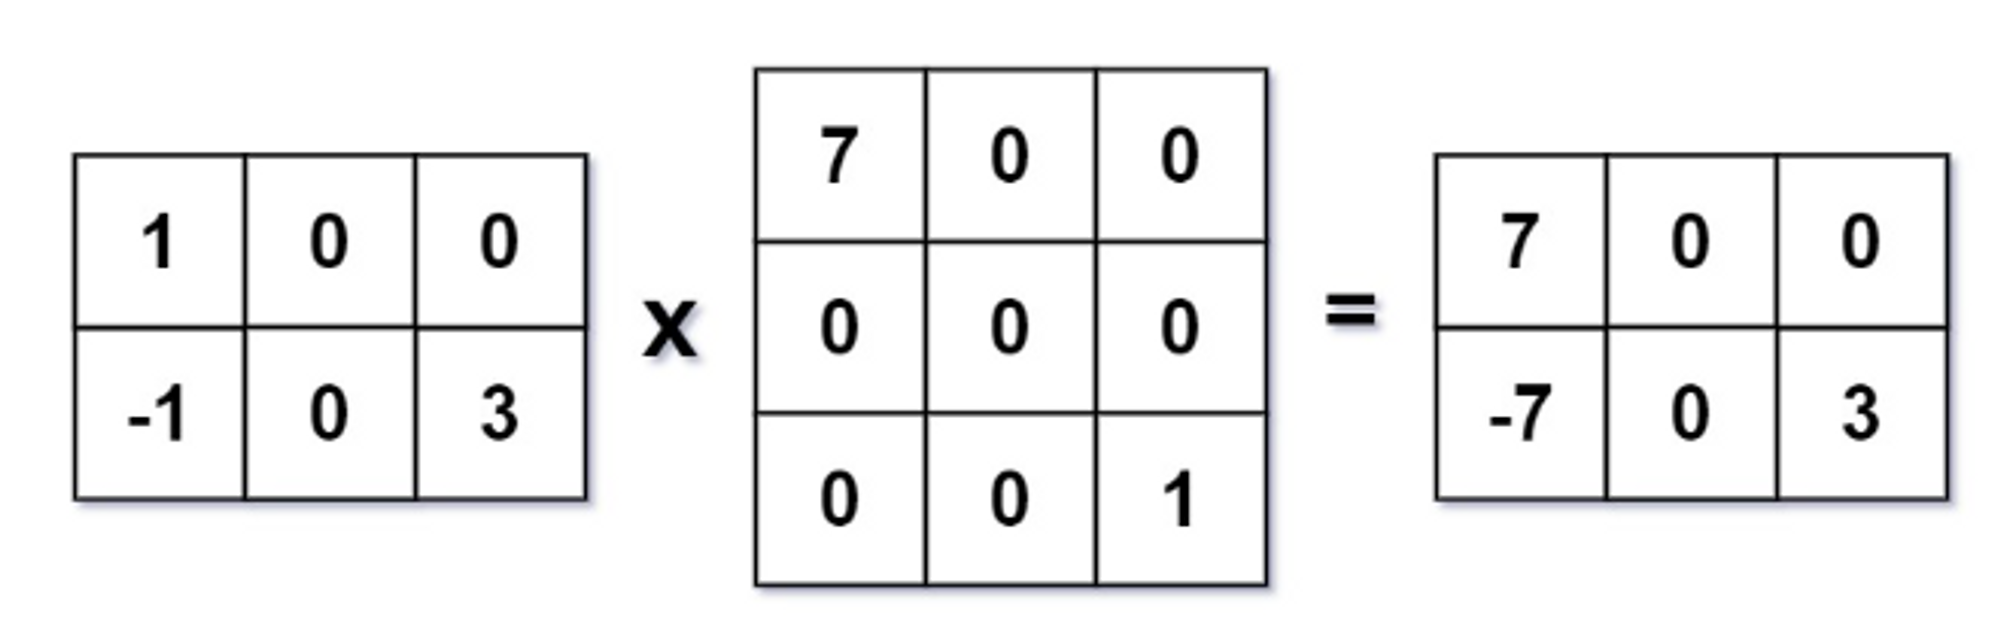

##**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

##**Output:**

##[[7,0,0],[-7,0,3]]

In [18]:
def multiply(mat1, mat2):
  m = len(mat1)
  k = len(mat1[0])
  n = len(mat2[0])

  result = [[0] * n for _ in range(m)]

  for i in range(m):
    for j in range(n):
      if mat1[i][j] != 0:
        for x in range(k):
          if mat2[x][j] != 0:
            result[i][j] += mat1[i][x] * mat2[x][j]

  return result

mat1 = [[1,0,0],[-1,0,3]]
mat2 = [[7,0,0],[0,0,0],[0,0,1]]
result = multiply(mat1,mat2)
print(f"Output : {result}")

Output : [[7, 0, 0], [-7, 0, 3]]
